In [42]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


## Data Preprocessing

In [43]:
# Hyperparameters

# y column normalize scaler
normalizer_constant = 2

# time series step size
time_step = 14

# NN parameters
learning_rate = 0.3
num_epoch = 500
NN_layer_dimension = [100,100]
train_size = 568 # 80% of the data

In [44]:
SNP = pd.read_csv('./SP500.csv')

# get all attributes
SNP_attributes = SNP.iloc[:,1:7]
# get last column (y)
SNP_price = SNP.iloc[:,-1:]

# normalize the data using MinMax scaller
scaler = MinMaxScaler()
scaler.fit(SNP_attributes)
SNP_attribute = scaler.transform(SNP_attributes)

Price_scaler = MinMaxScaler(feature_range=(0,1))
Price_scaler.fit(SNP_price)
SNP_price = Price_scaler.transform(SNP_price)

# scale data to [0,1]
# SNP_price = (SNP_price-SNP_price.min())/((SNP_price.max()*normalizer_constant)-SNP_price.min())

train_data = SNP_price[0:train_size, :]

SNP_attributes.shape
train_data_mul = SNP_attributes.iloc[0:train_size, :]
train_data_mul = np.array(train_data_mul)


def create_train_data(data):
    x = []
    y = []
    for i in range(time_step, len(data)):
        x.append(data[i-time_step:i,0])
        y.append(data[i,0])
    return x, y

X_train, y_train = create_train_data(train_data_mul)


In [45]:
# Reshaping 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [46]:
# NN 
def create_model(units=[12,3], learning_rate=0.3):
    model = tf.keras.models.Sequential()
    # model.add(tf.keras.layers.Input(shape=(5,)))
    # model.add(tf.keras.layers.Dense(units[0], activation=tf.nn.relu))
    # model.add(Dropout(0.2))
    # model.add(tf.keras.layers.Dense(units[1], activation=tf.nn.relu))
    # model.add(Dropout(0.2))
    # model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

    # LSTM RNN model
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    # model.add(Dropout(0.2))
    model.add(LSTM(units=50,return_sequences=False))
    # model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))


    # opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer='adam',loss='mean_squared_error')

    return model

model = create_model(units=NN_layer_dimension, learning_rate=learning_rate)




In [47]:
# Train
model.fit(X_train, y_train, epochs=500, batch_size=25, verbose=1)

Epoch 1/500
23/23 [==============================] - 3s 9ms/step - loss: 323.7055
Epoch 2/500
23/23 [==============================] - 0s 8ms/step - loss: 128.7449
Epoch 3/500
23/23 [==============================] - 0s 8ms/step - loss: 101.6693
Epoch 4/500
23/23 [==============================] - 0s 8ms/step - loss: 92.0507
Epoch 5/500
23/23 [==============================] - 0s 9ms/step - loss: 65.0898
Epoch 6/500
23/23 [==============================] - 0s 8ms/step - loss: 46.0606
Epoch 7/500
23/23 [==============================] - 0s 9ms/step - loss: 39.4775
Epoch 8/500
23/23 [==============================] - 0s 8ms/step - loss: 35.2362
Epoch 9/500
23/23 [==============================] - 0s 8ms/step - loss: 31.4707
Epoch 10/500
23/23 [==============================] - 0s 8ms/step - loss: 28.6014
Epoch 11/500
23/23 [==============================] - 0s 8ms/step - loss: 26.8043
Epoch 12/500
23/23 [==============================] - 0s 8ms/step - loss: 24.0824
Epoch 13/500
23/23 [==

In [48]:
# test data 
test_data = SNP_price[train_size - time_step:, :]
test_data_mul = SNP_attributes.iloc[train_size - time_step:, :]
test_data_mul = np.array(test_data_mul)
X_test = []
X_test_mul = []
y_test = SNP_price[train_size:, :]
for i in range(time_step, len(test_data)):
    X_test.append(test_data[i-time_step:i,0])


for i in range(time_step, len(test_data_mul)):
    X_test_mul.append(test_data_mul[i-time_step:i,0])


X_test, X_test_mul = np.array(X_test), np.array(X_test_mul)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_mul = np.reshape(X_test_mul, (X_test_mul.shape[0], X_test_mul.shape[1], 1))
X_test.shape

(149, 14, 1)

In [53]:
# predicted_price = model.predict(X_test)
predicted_price_mul = model.predict(X_test_mul)
# predicted_price = Price_scaler.inverse_transform(predicted_price)
predicted_price_mul = np.repeat(predicted_price_mul, 6,axis=-1)
predicted_price_mul = scaler.inverse_transform(predicted_price_mul)[:,0]
predicted_price_mul

array([13862.148 , 13876.204 , 13873.248 , 13835.832 , 13783.251 ,
       13699.173 , 11426.838 ,  8790.175 ,  4703.214 ,  3404.456 ,
        2775.4915,  2532.3027,  2401.238 ,  2073.282 ,  1827.5756,
        1770.003 ,  1728.5582,  1808.0677,  1846.7028,  1829.4158,
        1862.4624,  1899.0944,  1931.7875,  1864.5609,  1893.1505,
        1869.3225,  1783.4908,  1819.5778,  1598.1681,  1586.8137,
        1622.1304,  1665.2708,  1687.7915,  1783.4358,  1847.1235,
        1881.8862,  1857.9647,  1779.9641,  1749.0732,  1817.2467,
        1900.8367,  1973.1417,  1947.543 ,  1879.5238,  1913.0573,
        1988.0721,  2027.536 ,  2069.2795,  2056.643 ,  2130.3918,
        2053.7605,  2111.6538,  2057.913 ,  2073.117 ,  2054.5688,
        2102.0332,  2077.1958,  2099.61  ,  2078.786 ,  2140.191 ,
        2111.3662,  2136.4812,  2179.8591,  2193.1514,  2153.0642,
        2164.6416,  2119.7178,  2312.3428,  2343.0374,  2336.4468,
        2415.511 ,  2420.0298,  2478.3303,  2537.0293,  2547.2

/var/folders/86/p93c5vrd78lblk3lsz04s3r00000gn/T/ipykernel_4605/3761469700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred'] = predicted_price_mul


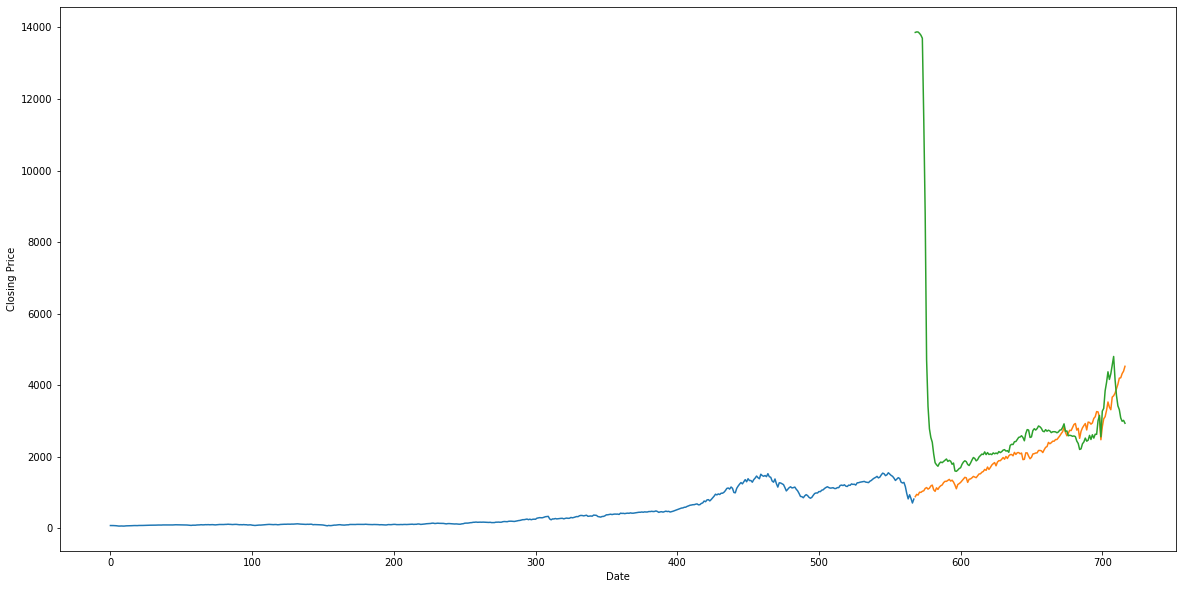

In [54]:
plt.figure(figsize=(20,10))
training = SNP[:train_size]
valid = SNP[train_size:]
valid.shape
valid['pred'] = predicted_price_mul


#plot
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(training["Closing Price"])
plt.plot(valid[['Closing Price', 'pred']])

